In [1]:
from pyspark.sql import SparkSession

## SparkContext

- Spark context is entry point for the pyspark functionality, used to communicate with in the cluster.
- Only one sparkContext can be created per JVM. In order to create another first the current is needed to be stopped, usnig `spark.sparkContext.stop()` method
- Driver programs creates and uses sparkContext to connect to cluster manager.
- Communicates to resource manager, manages pysparj jobs.

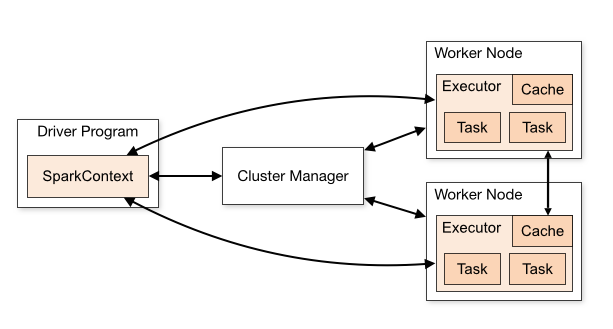

In [ ]:
# Code to connect to spark session
spark: SparkSession = (
    SparkSession.builder.appName("ExampleApp")
    .master("spark://spark-master:7077")  # Use the container hostname
    .config("spark.executor.memory", "1G")
    .config("spark.driver.memory", "1G")
    .getOrCreate()
)

In [3]:
spark.sparkContext

<SparkContext master=spark://spark-master:7077 appName=ExampleApp>

In [4]:
# returns appname

spark.sparkContext.appName

'ExampleApp'

In [5]:
# spark.sparkContext.stop()

## Commanly used variables.
- applicationId: Returns unique id of a PySpark Application
- version: Version of PySpark Cluster where job is running.
- uiWebUrl: Provides the spark web ui url; started by `SparkContext`

In [8]:
spark.sparkContext.applicationId

'app-20250915154821-0000'

In [9]:
spark.sparkContext.version

'3.5.0'

In [10]:
spark.sparkContext.uiWebUrl

'http://02c4ff369604:4040'

## Some Commly used used mdethod in sparkcontext
- `accumulator(value[, accum_param])`: Creates an pyspark_accumulator_variable with initial specified value. Only driver can access accumulator variable.


## Accumulator
- Write only variable and initialize only once variables
- Only tasks that are running on workers are allowed to update and updates from the workers get propogated automatically to the driver program.
- only dirver program is allowed to access the value using `value` property.


### Creating Accumulator
- `sparkContext.accumulator()` is used to define
- `add()` function is used to add/update value in accumulator. (adds in place)
- `value` property is used to access the value stored in accumulator.

In [ ]:
# In this example, rdd.foreach() is executed on workers and accum.value is called from PySpark driver program.

accum = spark.sparkContext.accumulator(0)
rdd = spark.sparkContext.parallelize(list(range(1, 10)))
print(rdd.collect())
print()
rdd.foreach(lambda x: accum.add(x))
print(accum.value)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

45


## Accumulator with custom function
- Using accumulator with custom function

In [7]:
accumSquare = spark.sparkContext.accumulator(0)  # initialize with 0


def squared_sum(x):
    global accumSquare
    accumSquare += x**2


rdd.foreach(squared_sum)

print(accumSquare.value)

285


- `broadcast(value)`: Creates broadcast variable (read only). This will be broadcast to entire cluster. Variable can be broadcasted to PySpark only once
- Efficient way to share read-only variable to all workers (executors).
- Why efficient
    - suppose there are 1000 tasks is spread accross 10 workers, and lookup table of size 10MB is used in each task.
    - Spark will give 1000 tasks a copy of that lookup table. Thus 1000 * 10, which is approx 10GB. for a non changing variable.
- Broadcast variable is send once per worker node. Thus 10 copies of lookup is given to each worker 10 * 10 approx 100MB.
- `.value` is used to access the broadcasted object inside task.
- Cannot be modified by the workers
- Often used for map-side joins (joining a huge dataset with a smaller dataset).
- Mapping State code (MP, MH, RJ, GJ) to users location. (Example)